# 1

Решение:
\begin{equation*}
u = (x, y) \\
\phi(x, y) = (x, \ y, \sin{x} + \cos{y}) \\
\ \\
k(u_1, u_2) = \phi_1(x_1, y_1)^T \cdot \phi_2(x_2, y_2) = \\
= (x_1, \ y_1, \sin{x_1} + \cos{y_1})^T \cdot (x_1, \ y_1, \sin{x_1} + \cos{y_1}) = \\
= x_1\cdot x_2 + y_1\cdot y_2 + (\sin{x_1} + \cos{y_1})(\sin{x_2} + \cos{y_2}) \\
\end{equation*}

Ответ: $$k(u_1, u_2) = x_1\cdot x_2 + y_1\cdot y_2 + (\sin{x_1} + \cos{y_1})(\sin{x_2} + \cos{y_2})$$

# 2

Рассматривать n < 3, понятно, что не стоит. Ибо при n < 3 при любой расстановке классов в $R^3$ точки будут линейно отделяться (при n = 1 одна точка, один класс, при n = 2, либо обе точки одинакового класса, либо между ними можно провести прямую которая их разделяет)

Рассмотрим случай при n = 3, у нас возможны 2 варианта, либо точки не лежат на одной прямой, либо точки лежат на одной прямой. Пусть три точки не лежат на одной прямой и у нас 2 точки одного класса и одна другого, тогда очевидно, что

# 3

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

5 важных генов: ['BAG1', 'BIRC5', 'ACTR3B', 'MIA', 'KRT17']

TPR1: 0.8695652173913043
TNR1: 0.9029126213592233



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


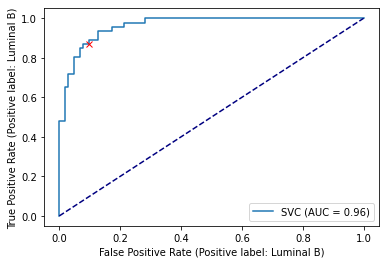

In [ ]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"])]

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

genes = df.columns[np.argsort(np.abs(model.coef_[0]))][::-1][:5].to_list()
print(f'5 важных генов: {genes}\n')

M = confusion_matrix(y_test, y_pred)

TP = M[1, 1]
TN = M[0, 0]
FN = M[1, 0]
FP = M[0, 1]
TPR1 = TP / (TP + FN)
TNR1 = TN / (TN + FP)

print(f'TPR1: {TPR1}\nTNR1: {TNR1}\n')

plot_roc_curve(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.plot(1 - TNR1, TPR1, "x", c="red")

TPR2: 0.8478260869565217
TNR2: 0.8349514563106796



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


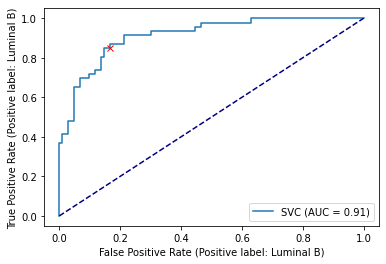

In [ ]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"]), genes + ['Subtype']]

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

M = confusion_matrix(y_test, y_pred)

TP = M[1, 1]
TN = M[0, 0]
FN = M[1, 0]
FP = M[0, 1]
TPR2 = TP / (TP + FN)
TNR2 = TN / (TN + FP)

print(f'TPR2: {TPR2}\nTNR2: {TNR2}\n')

plot_roc_curve(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.plot(1 - TNR2, TPR2, "x", c="red")

In [ ]:
df = pd.DataFrame({
    'TPR': [TPR1, TPR2],
    'TNR': [TNR1, TNR2],
    'AUC': [0.96, 0.91]}, 
    index = ['all genes', '5 genes'])
df

,TPR,TNR,AUC
all genes,0.869565,0.902913,0.96
5 genes,0.847826,0.834951,0.91


# 4

In [ ]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

b =  accuracy_score(y_test, y_pred)
print(b)

a = {i: 0 for i in np.unique(y_test)}
for i, j in zip(y_pred, y_test):
  if i == j:
    a[i] += 1
a = {i: round(a[i]/list(y_test).count(i), 3) for i in a}
print(a)

0.9126637554585153
{'HER2-enriched': 0.938, 'Healthy': 1.0, 'Luminal A': 0.951, 'Luminal B': 0.804, 'Normal-like': 0.0, 'Triple-negative': 1.0}


# PCA

In [ ]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()

model = PCA()
model.fit(X)
X_pca = model.transform(X)

df.iloc[:, :-1] = X_pca
df.columns = [f"PC{i + 1}" for i in range(X.shape[1])] + ["Subtype"]

X_pca = df[['PC1', 'PC2', 'Subtype']].iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, random_state=17)
model = SVC(kernel="linear", class_weight="balanced")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

b1 =  accuracy_score(y_test, y_pred)
print(b1)

a1 = {i: 0 for i in np.unique(y_test)}
for i, j in zip(y_pred, y_test):
  if i == j:
    a1[i] += 1
a1 = {i: round(a1[i]/list(y_test).count(i), 3) for i in a1}
print(a1)

0.8427947598253275
{'HER2-enriched': 0.75, 'Healthy': 0.88, 'Luminal A': 0.883, 'Luminal B': 0.674, 'Normal-like': 0.8, 'Triple-negative': 0.971}


In [ ]:
df = pd.DataFrame({i: [a[i], a1[i]] for i in np.unique(y_test)}, index = ['50genes', 'PCA'])
df['accuracy'] = [b, b1]
df

,HER2-enriched,Healthy,Luminal A,Luminal B,Normal-like,Triple-negative,accuracy
50genes,0.938,1.00,0.951,0.804,0.0,1.000,0.912664
PCA,0.750,0.88,0.883,0.674,0.8,0.971,0.842795


# 5

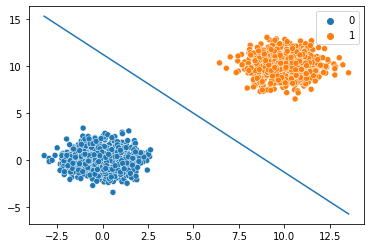

In [ ]:
np.random.seed(13)

N = int(1e3)

X1 = np.random.normal(loc=0, size=(N, 2))
X2 = np.random.normal(loc=10, size=(N, 2))

X = np.vstack([X1, X2])

y = np.array([0]*N + [1]*N)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
C = 0.01

model = SVC(kernel="linear", C=C)
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]
    
xx = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
yy = (-w[0] * xx - b) / w[1]
plt.plot(xx, yy)

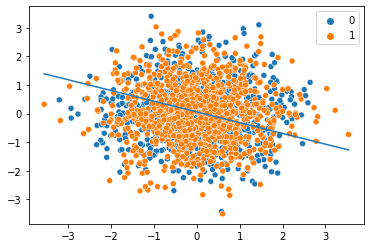

In [ ]:
np.random.seed(13)

N = int(1e3)
X1 = np.random.normal(loc=0, size=(N, 2))
X2 = np.random.normal(loc=0, size=(N, 2))

X = np.vstack([X1, X2])
y = np.array([0]*N + [1]*N)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
C = 0.01

model = SVC(kernel="linear", C=C)
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]
    
xx = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
yy = (-w[0] * xx - b) / w[1]
plt.plot(xx, yy)